# 1.0 - Baseline Model Comparison

## Objective

This notebook establishes baseline performance for the income prediction task. It compares a simple linear model (`ElasticNet`) against a standard ensemble model (`RandomForest`) to set a benchmark for more complex models.

This notebook will use the centralized scripts from the `src/` directory for:
- Data loading (`src/data/make_dataset.py`)
- Feature engineering (`src/features/build_features.py`)
- Model training and evaluation (`src/models/train_model.py`)
- Visualization (`src/visualization/visualize.py`)

In [1]:
import pandas as pd
import sys
import os

# Add src to path to allow imports
sys.path.append(os.path.join(os.path.abspath(''), '..', 'src'))

from data.make_dataset import load_data
from features.build_features import (
    split_features_target,
    label_encode_features,
    one_hot_encode_features,
    split_data
)
from models.train_model import train_and_evaluate, save_model
from visualization.visualize import plot_model_evaluation

## 1. Load Data

Load the cleaned dataset from the `data/processed` directory.

In [2]:
df = load_data('../data/processed/adult_cleaned.csv')
X, y = split_features_target(df)

df.head()

Dataset loaded successfully from ..\data\processed\adult_cleaned.csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## 2. ElasticNet (Baseline Linear Model)

First, we'll train a regularized linear model. This requires `One-Hot Encoding` for the categorical variables.

In [3]:
# Prepare data for linear models
X_ohe = one_hot_encode_features(X)
X_train_ohe, X_test_ohe, y_train, y_test = split_data(X_ohe, y)

# Train and evaluate
model_en, metrics_en = train_and_evaluate(X_train_ohe, y_train, X_test_ohe, y_test, "ElasticNet")

print("ElasticNet Performance:")
print(pd.Series(metrics_en))

ElasticNet Performance:
Accuracy     0.773908
Precision    0.583830
Recall       0.305977
F1-Score     0.401522
ROC-AUC      0.628193
dtype: float64


c:\Users\Anibal\Programming-projects\Projects\Kib-Module-5\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saved confusion matrix to ../reports/figures/1.0_elasticnet_confusion_matrix.png


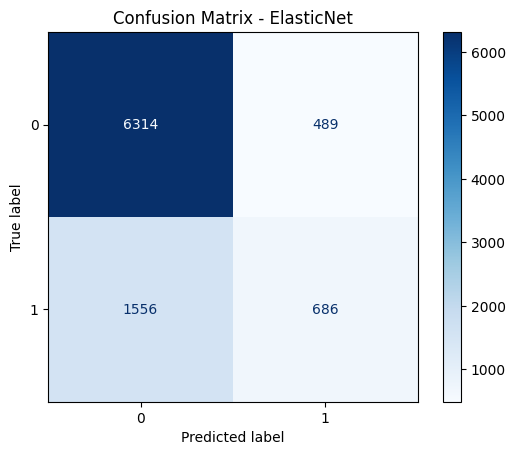

Saved ROC curve to ../reports/figures/1.0_elasticnet_roc_curve.png


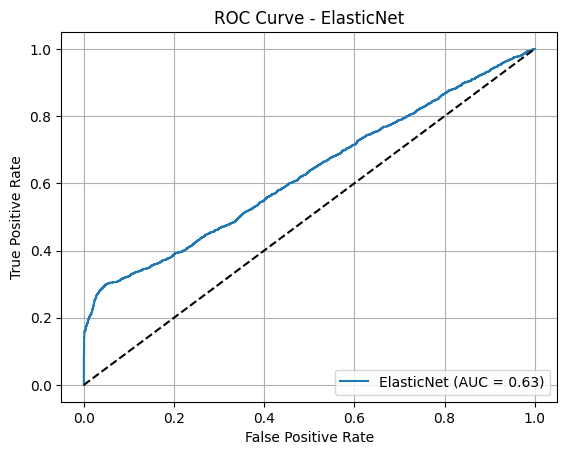

In [4]:
plot_model_evaluation(y_test, model_en, X_test_ohe, "ElasticNet", save_path_prefix='../reports/figures/1.0_elasticnet')

## 3. Random Forest (Baseline Ensemble Model)

Now, we'll train a `Random Forest` model. This is a robust ensemble method that can serve as a strong baseline. We will use `Label Encoding` for this model.

In [5]:
# Prepare data for tree-based models
X_le = label_encode_features(X)
X_train_le, X_test_le, y_train, y_test = split_data(X_le, y)

# Train and evaluate
model_rf, metrics_rf = train_and_evaluate(X_train_le, y_train, X_test_le, y_test, "RandomForest")

print("Random Forest Performance:")
print(pd.Series(metrics_rf))

Random Forest Performance:
Accuracy     0.851299
Precision    0.747927
Recall       0.603479
F1-Score     0.667983
ROC-AUC      0.904571
dtype: float64


Saved confusion matrix to ../reports/figures/1.0_randomforest_confusion_matrix.png


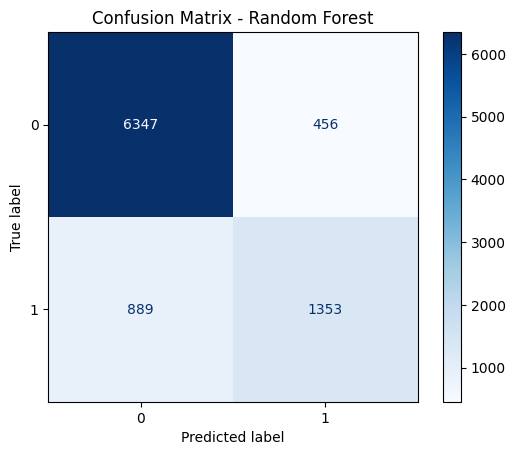

Saved ROC curve to ../reports/figures/1.0_randomforest_roc_curve.png


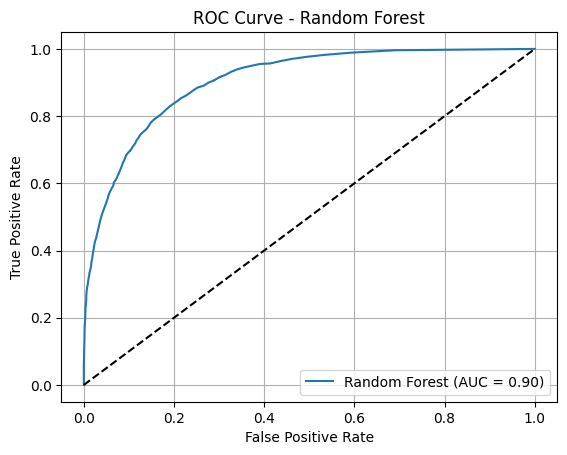

In [6]:
plot_model_evaluation(y_test, model_rf, X_test_le, "Random Forest", save_path_prefix='../reports/figures/1.0_randomforest')

## 4. Conclusion

Let's compare the performance of the two baseline models.


In [7]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    "ElasticNet": metrics_en,
    "RandomForest": metrics_rf
}).round(4)

print("Baseline Model Comparison:")
print(results_df)

Baseline Model Comparison:
           ElasticNet  RandomForest
Accuracy       0.7739        0.8513
Precision      0.5838        0.7479
Recall         0.3060        0.6035
F1-Score       0.4015        0.6680
ROC-AUC        0.6282        0.9046


### Save Best Baseline Model

Based on the `ROC-AUC` score, we will select the best performing model from this baseline comparison and save it. This model will serve as the benchmark for the more advanced models in the next notebook.

In [8]:
# Define the save path relative to the notebook's location
models_dir = '../models/'

# Determine the best model
if metrics_rf['ROC-AUC'] > metrics_en['ROC-AUC']:
    best_baseline_model = model_rf
    model_name = "RandomForest"
else:
    best_baseline_model = model_en
    model_name = "ElasticNet"

print(f"Best baseline model is: {model_name} with ROC-AUC of {results_df.loc['ROC-AUC', model_name]}")

# Construct the full path and save the model
save_path = os.path.join(models_dir, 'baseline_model.joblib')
save_model(best_baseline_model, save_path)

Best baseline model is: RandomForest with ROC-AUC of 0.9046
Model saved successfully to ..\models\baseline_model.joblib
